# Mathematic expression 
https://www.codecogs.com/latex/eqneditor.php?lang=es-es

<h3>Modelo ideal</h3>
<h3>$ Y_{e} = \alpha + \beta x$</h3>

<h3>Modelo real</h3>
<h3>$ Y_{e} = \alpha + \beta x + \epsilon$</h3>

y = Variable de salida

x = variable de entrada

$ \epsilon $ = Error, variable aleatoria cons distribucion normal

## Tecnica de los minimos cuadrados

<h3>$ e_{i} = (y_{i}- Y_{e}(x_{i}))$</h3>

El objetivo es minimizar la suma de los errores al cuadrado sobre todos los puntos del data set.

Aplicando calculo multivariable queda lo siguiente: 

<h2>$ \beta = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})((y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$</h2>

<h2> $\alpha = \bar{y} - \beta*\bar{x}$</h2>

## Modelo de regresion lineal con datos simulados

* X: 100 valores segun N(1.5,2.5)
* Ye: 2 + 0.3x + e
* e: segun N(0,0.8)



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython .core. interactiveshell import InteractiveShell  # todas las salidas
InteractiveShell . ast_node_interactivity = "all"

In [3]:
x = 1.5 + 2.5*np.random.random(100)
e = 0.8*np.random.randn(100)
y_pred = 5+1.9*x
y_act = 5 + 1.9*x + e 

x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

data = pd.DataFrame({
    
    'x':x_list,
    'y_actual': y_act_list,
    'y_prediccion': y_pred_list
    
})

data.head()


,x,y_actual,y_prediccion
0,2.851672,10.532053,10.418176
1,2.248322,7.833181,9.271812
2,3.882610,12.874913,12.376960
3,3.270668,10.083011,11.214269
4,3.557088,11.466795,11.758468


Text(0.5, 1.0, 'Valor actual vs. Valor predecido')

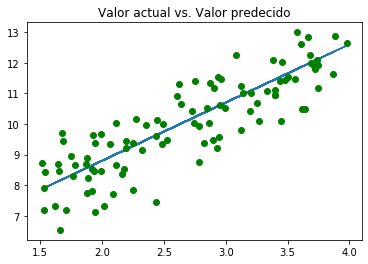

In [4]:
plt.plot(x, y_pred)
plt.plot(x,y_act, 'go')
plt.title('Valor actual vs. Valor predecido')

Text(0.5, 1.0, 'Valor actual vs. Valor predecido')

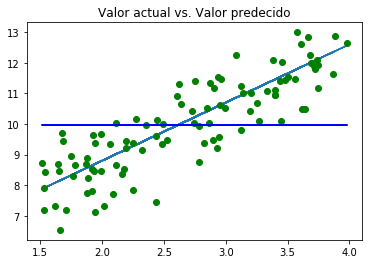

In [5]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]
#y_mean

plt.plot(x, y_pred)
plt.plot(x,y_act, 'go')
plt.plot(x, y_mean, 'b')
plt.title('Valor actual vs. Valor predecido')

## Errores cuadraticos 

* SSD = Distancia entre el modelo y los valores reales 
* SST = Distancia entre el promedio y los valores reales 
* SSR = Distancia entre el modelo y el promedio 

SST = SSR + SSD

Lo que importa es que SSR sea grande y SSD sea lo mas pequena posible. 

<h3>$R^{2} = \frac{SSR}{SST}$</h3>


In [6]:
data['SSR'] = (data['y_prediccion']-np.mean(y_act))**2
data['SSD'] = (data['y_prediccion']-data['y_actual'])**2
data['SST'] = (data['y_actual'] - np.mean(y_act))**2
data.head()

SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])


R2 = SSR/SST
R2

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.851672,10.532053,10.418176,0.193639,0.012968,0.306828
1,2.248322,7.833181,9.271812,0.498888,2.069661,4.600817
2,3.882610,12.874913,12.376960,5.754373,0.247957,8.391337
3,3.270668,10.083011,11.214269,1.528034,1.279744,0.011000
4,3.557088,11.466795,11.758468,3.169594,0.085073,2.216118


0.7960411670460876

(array([ 6., 10., 13., 13., 22., 12., 10.,  6.,  7.,  1.]),
 array([-1.51833014, -1.14990436, -0.78147858, -0.41305279, -0.04462701,
         0.32379877,  0.69222455,  1.06065033,  1.42907612,  1.7975019 ,
         2.16592768]),
 <a list of 10 Patch objects>)

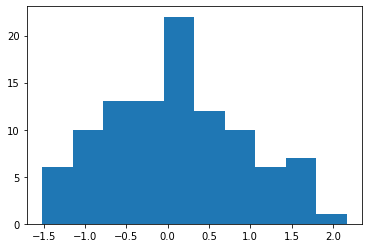

In [7]:
plt.hist(data['y_prediccion']-data['y_actual'])
#El error sigue una distribucion normal. 

## Regression rect

<h2>$ \beta = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})((y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$</h2>

<h2> $\alpha = \bar{y} - \beta*\bar{x}$</h2>

<h2>$ Y_{e} = \alpha + \beta x + \epsilon$</h2>

Alpha y beta son estimadores 


In [8]:
x_mean=np.mean(data['x'])
y_mean=np.mean(data['y_actual'])

beta = sum((data['x']-x_mean)*(data['y_actual']-y_mean))/sum((data['x']-x_mean)**2)
alpha = y_mean - beta*x_mean\

beta, alpha

(1.8258875236745487, 5.10014913068359)

Modelo lineal ideal 

y = alpha + beta*x

In [9]:
data['y_model'] = alpha + beta*data['x']
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,y_model
0,2.851672,10.532053,10.418176,0.193639,0.012968,0.306828,10.306981
1,2.248322,7.833181,9.271812,0.498888,2.069661,4.600817,9.205333
2,3.882610,12.874913,12.376960,5.754373,0.247957,8.391337,12.189359
3,3.270668,10.083011,11.214269,1.528034,1.279744,0.011000,11.072021
4,3.557088,11.466795,11.758468,3.169594,0.085073,2.216118,11.594992


In [10]:
SSR2 = sum((data['y_model']-y_mean)**2)
SSD2 = sum((data['y_model']- data['y_actual'])**2)
SST2 = sum((data['y_actual'] - y_mean)**2)

SSR2, SSD2, SST2

R22 = SSR2/SST2
R22

(171.03464757319438, 62.82057125989733, 233.85521883309164)

0.7313698125987349

Text(0.5, 1.0, 'Valor actual vs. Valor predecido')

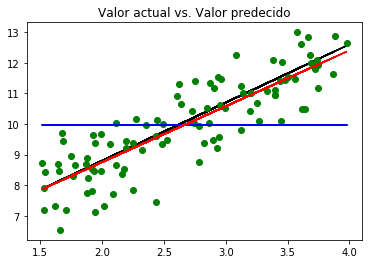

In [11]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]

%matplotlib inline
plt.plot(data['x'], data['y_prediccion'], 'black')
plt.plot(data['x'], data['y_actual'], 'go')
plt.plot(data['x'], y_mean, 'b')
plt.plot(data['x'], data['y_model'], 'r')
plt.title('Valor actual vs. Valor predecido')

## P-value 

Para comprobar la existencia de la relacion, se plantea el contraste de hipotesis 

<h3><center>$ \left\{\begin{matrix} 
 Ho: & \beta = 0 \\
 H1: & \beta \neq 0 \\
\end{matrix}\right. $ </center></h3>

si el p-valor resultante es menor que el nivel de significancia, se rechaza la hipotesis nula y se acepta la una relacion lineal existente entre X e Y.

## F-value, multiple linear regression

<h3><center>$ \left\{\begin{matrix} 
 Ho: & \beta_{1} = \beta_{2} =... \beta_{k}=0 \\
 H1: & \beta_{i} \neq 0 \\
\end{matrix}\right. $ </center></h3>

<h2><center> $ F = \frac{\frac{SSR}{k}}{\frac{SSD}{n-k-1}} $</center></h2>

<h3><center> $p = P(F>F_{k,n-k-1})$</center></h3>

#### RSE, Residual standar error 

* Simple linear regression

<h3><center> $RSE = \sqrt{\frac{SSD}{n-2}} $ </center></h3>

* Multiple linear regression

<h3><center> $RSE = \sqrt{\frac{SSD}{n-k-1}} $ </center></h3>

### RSE


In [15]:
RSE = np.sqrt(SSD2/(len(data)-2))
RSE

0.8006411414272259

In [18]:
RSE / np.mean(data['y_actual'])

0.08023958124867048

## Using stasmodel for linear regression

* stasmodel
* skilearn

In [19]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
data2 = pd.read_csv(mainpath+'ads/Advertising.csv')
data2.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
import statsmodels.formula.api as smf

In [25]:
lm = smf.ols(formula='Sales~TV', data=data2).fit()
lm.params
lm.pvalues
lm.rsquared
lm.rsquared_adj

#Predictive linear model of Sales is:
# Sales = 7.032594 + 0.047537*TV

Intercept    7.032594
TV           0.047537
dtype: float64

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

0.611875050850071

0.6099148238341623

In [28]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: Sales            AIC:                1042.0913
Date:               2022-01-25 18:57 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     7.0326     0.4578   15.3603   0.0000   6.1297   7.9355
TV            0.0475     0.0027   17.6676   0.0000   0.0422   0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Prob(Omnibus):        0.767         Jarque-Bera (JB):        0.669
Skew:                 -0.089        Prob(JB):                0.716
Kurtosis:             2.779         Condition No.:           338  
==================================================================

"""

In [30]:
sales_pred = lm.predict(pd.DataFrame(data2['TV']))
sales_pred


0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

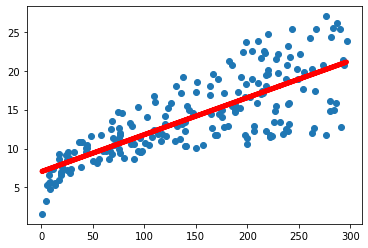

In [37]:
plt.scatter(x = data2['TV'], y = data2['Sales'])
plt.plot(data2['TV'], sales_pred, c='r', linewidth = 5)

In [44]:
data2['sales_pred'] = 7.032594 + 0.047537*data2['TV']
RSE = np.sqrt((sum((data2['Sales']-data2['sales_pred'])**2))/(len(data2)-2))
RSE 
Error = RSE/np.mean(data2['Sales'])*100
Error #% de error promedio que no queda explicado en el modelo. Error que no explica las discrepancias entre la prediccion y los valores reales


3.258656369238098

23.23876890168014

,TV,Radio,Newspaper,Sales,sales_pred
0,230.1,37.8,69.2,22.1,17.970858
1,44.5,39.3,45.1,10.4,9.147990
2,17.2,45.9,69.3,9.3,7.850230
3,151.5,41.3,58.5,18.5,14.234450
4,180.8,10.8,58.4,12.9,15.627284


(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

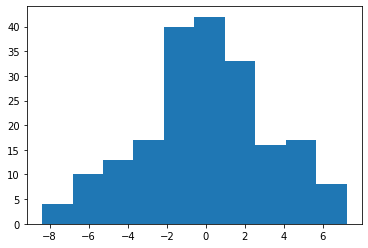

In [45]:
plt.hist(data2['Sales']-data2['sales_pred'])

## Multiple linear model

Guias para filtrar todos los modelos(Utilizar variables con p mas pequenos posibles)

* Agregar todas las varibles y despues irlas quitando
* Viceversa




In [47]:
lm2 = smf.ols(formula='Sales~TV+Newspaper', data = data2).fit()
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.642    
Dependent Variable: Sales            AIC:                1025.7782
Date:               2022-01-25 19:26 BIC:                1035.6731
No. Observations:   200              Log-Likelihood:     -509.89  
Df Model:           2                F-statistic:        179.6    
Df Residuals:       197              Prob (F-statistic): 3.95e-45 
R-squared:          0.646            Scale:              9.7389   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     5.7749     0.5253   10.9928   0.0000   4.7389   6.8110
TV            0.0469     0.0026   18.1727   0.0000   0.0418   0.0520
Newspaper     0.0442     0.0102    4.3463   0.0000   0.0242   0.0643
------------------------------------------------------------------
Omnibus:              0.658         Durbin-Watson:           1.969
Prob(Omnibus):        0.720         Jarque-Bera (JB):        0.415
Skew:                 -0.093        Prob(JB):                0.813
Kurtosis:             3.122         Condition No.:           410  
==================================================================

"""

In [50]:
sales_pred2 = lm2.predict(data2[['TV', 'Newspaper']])
sales_pred2

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [52]:
data2['sales_pred2'] = 5.7749 + 0.0469*data2['TV']+0.0442	*data2['Newspaper']
RSE = np.sqrt((sum((data2['Sales']-data2['sales_pred2'])**2))/(len(data2)-2-1))
RSE 

3.120720001141461

In [53]:
# Agregando todas la posbiles variables de entrada

lm3 = smf.ols(formula='Sales~TV+Newspaper+Radio', data = data2).fit()
lm3.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                780.3622
Date:               2022-01-25 21:19 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
Radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================

"""

In [55]:
data2['sales_pred3'] = 2.9389	 + 0.0458*data2['TV']-0.0010*data2['Newspaper']+0.1885*data2['Radio']
RSE = np.sqrt((sum((data2['Sales']-data2['sales_pred3'])**2))/(len(data2)-3-1))
RSE 
#Notese que el coeficiente de Newspaper se torna negativo lo que indica que puede existir una multicolinealidad con otra variable.
#posiblemente con Radio. 

1.68552305639701

## Multicolinealidad
### Factor de inflacion de la Varianza VIF
#### Condiciones:

* Si VIF = 1; las variables no estan correlacionadas
* Si VIF > 5; las variables tienen una correlacion moderada y se pueden quedar en el modelo
* Si VIF < 5; las variables tienen una correlacion fuerte y no se pueden quedar en el modelo

* $VIF = \frac{1}{1-R^{2}}$


In [60]:
# Newspaper ~ TV + Radio
lm_n = smf.ols(formula='Newspaper~TV+Radio', data = data2).fit()
VIF = 1/(1-lm_n.rsquared)
VIF

1.1451873787239286

In [61]:
# TV ~ Newspaper + Radio
lm_tv = smf.ols(formula='TV~Newspaper+Radio', data = data2).fit()
VIF = 1/(1-lm_tv.rsquared)
VIF

1.0046107849396502

In [62]:
# Radio ~ Newspaper + TV
lm_r = smf.ols(formula='Radio~TV+Newspaper', data = data2).fit()
VIF = 1/(1-lm_r.rsquared)
VIF

1.1449519171055353

In [63]:
# Se concluye que Newspaper y radio posee una corelacion fuerte, por lo tanto hay que descartar una. 

## Validacion de modelo

### Dividir el dataset en conjunto de entrenamiento y de testing

#### Ejemplo con datos reales

(array([ 3.,  5., 16., 30., 41., 38., 30., 29.,  5.,  3.]),
 array([-2.91525566, -2.37202264, -1.82878962, -1.2855566 , -0.74232358,
        -0.19909056,  0.34414246,  0.88737547,  1.43060849,  1.97384151,
         2.51707453]),
 <a list of 10 Patch objects>)

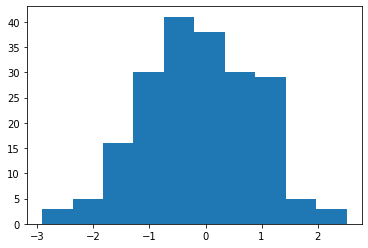

In [65]:
a = np.random.randn(len(data2))
plt.hist(a)

In [68]:
#Estableciendo la condicion como % 
check = (a<0.8)
training = data2[check]
#training
testing = data2[~check]
#testing
len(training), len(testing)

(159, 41)

In [69]:
lm_train = smf.ols(formula='Sales~TV+Radio', data = training).fit()
lm_train.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.884   
Dependent Variable: Sales            AIC:                632.7251
Date:               2022-01-26 00:52 BIC:                641.9318
No. Observations:   159              Log-Likelihood:     -313.36 
Df Model:           2                F-statistic:        601.2   
Df Residuals:       156              Prob (F-statistic): 4.90e-74
R-squared:          0.885            Scale:              3.0736  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    3.0794     0.3398    9.0626   0.0000   2.4082   3.7506
TV           0.0447     0.0016   28.0740   0.0000   0.0415   0.0478
Radio        0.1854     0.0094   19.7975   0.0000   0.1669   0.2039
-----------------------------------------------------------------
Omnibus:             52.407       Durbin-Watson:          1.939  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       131.360
Skew:                -1.378       Prob(JB):               0.000  
Kurtosis:            6.498        Condition No.:          419    
=================================================================

"""

#### Validacion del modelo con el conjunto de testing

In [70]:
sales_pred = lm_train.predict(testing)
sales_pred

1      12.352467
2      12.356185
3      17.503699
8       3.852928
11     17.120490
14     18.296665
24      8.198457
26     14.895080
36     23.122905
39     20.254216
41     17.178586
44      8.964745
45     15.073209
51      9.344574
55     21.122880
57     12.723544
61     22.668808
68     18.783452
70     17.646935
73      9.917296
75     11.934977
76      4.604651
77     13.746010
80     11.442070
81     14.553114
86     11.585895
89     16.845523
100    13.812798
103    14.662643
105    17.841451
112    13.783918
123    14.992904
142    19.084987
152    16.226747
154    15.381102
155     5.412856
164    11.040524
173    11.919234
176    19.775393
185    20.598340
198    23.535362
dtype: float64

In [72]:
ssd = sum((testing['Sales']-sales_pred)**2)
ssd
rse = np.sqrt(ssd/(len(testing)-2-1))
rse
sales_mean = np.mean(testing['Sales'])
err = rse/sales_mean
err

80.27089983090438

1.4534070664522287

0.09667373414104699

### Regresion lineal en Python 
#### El paquete scikit-learn para regresion lineal y la seleccion de rasgos

In [75]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

data2.head()

,TV,Radio,Newspaper,Sales,sales_pred,sales_pred2,sales_pred3
0,230.1,37.8,69.2,22.1,17.970858,19.62523,20.53358
1,44.5,39.3,45.1,10.4,9.147990,9.85537,12.33995
2,17.2,45.9,69.3,9.3,7.850230,9.64464,12.30951
3,151.5,41.3,58.5,18.5,14.234450,15.46595,17.60415
4,180.8,10.8,58.4,12.9,15.627284,16.83570,13.19694


In [76]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data2[feature_cols]
Y = data2['Sales']

estimador = SVR(kernel='linear')
selector = RFE(estimador, 2, step=1)
selector = selector.fit(X,Y)
selector.ranking_
selector.support_

array([1, 1, 2])

array([ True,  True, False])

In [80]:
from sklearn.linear_model import LinearRegression 
X_pred = X[['TV','Radio']]
Lm = LinearRegression()
Lm.fit(X_pred,Y)
Lm.score(X_pred,Y) # R2
Lm.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.8971942610828956

2.9210999124051362

## Variables categoricas 

Se añaden la variables dummy tal que sea igual al numero de variables categóricas -1 

Sea $x_{k}$ las variables categoricas tal que:

<h3><center> $x_{k} =$$ \left\{\begin{matrix} 
   1, es\ categorica \\ 
  0, no\ es\ categorica  \\
\end{matrix}\right. $ </center></h3>

Entonces el modelo se convertiria en: 

<h3><center>$ \left\{\begin{matrix} 
  y_{model}= \alpha + \beta_{1}x_{1}+...+\beta_{k}+...+\beta_{n}x_{n} + \epsilon, Vcategorica \\ 
   y_{model}= \alpha + \beta_{1}x_{1}+...+\beta_{n}x_{n} + \epsilon, V\ no\ categorica  \\
\end{matrix}\right. $ </center></h3>

Solo la variable categorica posee el factor $k-esimo$

### Tratamiento de las variables categoricas 

In [82]:
mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
df = pd.read_csv(mainpath+'ecom-expense/Ecom Expense.csv')
df.head(10)
 

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
5,TXN006,49,6,6282,48.974268,2,Male,Tier 2,2375.036467
6,TXN007,21,14,7086,961.203768,8,Male,Tier 1,7494.474559
7,TXN008,58,9,8881,962.253740,10,Male,Tier 3,10782.944920
8,TXN009,20,6,5635,858.328131,5,Male,Tier 1,3854.277411
9,TXN010,48,12,20861,43.036737,4,Female,Tier 2,5346.140262


In [85]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City')
dummy_gender.head()
dummy_city_tier.head()


,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [90]:
column_names = df.columns.values.tolist()
column_names

df_new = df[column_names].join(dummy_gender)

column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head(10)

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0
5,TXN006,49,6,6282,48.974268,2,Male,Tier 2,2375.036467,0,1,0,1,0
6,TXN007,21,14,7086,961.203768,8,Male,Tier 1,7494.474559,0,1,1,0,0
7,TXN008,58,9,8881,962.253740,10,Male,Tier 3,10782.944920,0,1,0,0,1
8,TXN009,20,6,5635,858.328131,5,Male,Tier 1,3854.277411,0,1,1,0,0
9,TXN010,48,12,20861,43.036737,4,Female,Tier 2,5346.140262,1,0,0,1,0


In [96]:
feature_cols2 = ['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 'City_Tier 1',
                'City_Tier 2', 'City_Tier 3', 'Record']

X = df_new[feature_cols2]
Y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)
lm.intercept_
list(zip(feature_cols2, lm.coef_))
lm.score(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-79.41713030137362

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

0.9179923586131016

In [110]:
# CODIGO PRO!
df_new['prediction'] = lm.predict(pd.DataFrame(df_new[feature_cols2]))
df_new.head(1)

RSE = np.sqrt(sum((df_new['prediction']- df_new['Total Spend'])**2)/(len(df_new)-len(feature_cols2)-1))
RSE
Total_mean = np.mean(df_new['Total Spend'])
ER = RSE/Total_mean*100
ER

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.69672


803.1318809818158

13.03113568029415

### Enmascarado de variables categoricas redundantes

In [114]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender').iloc[:,1:]
dummy_gender.head(1)
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City').iloc[:,1:]
dummy_city_tier.head(1)

,Gender_Male
0,0


,City_Tier 2,City_Tier 3
0,0,0


In [115]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head(3)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0


In [118]:
feature_cols3 = ['Monthly Income', 'Transaction Time', 'Gender_Male', 
                'City_Tier 2', 'City_Tier 3', 'Record']
X = df_new[feature_cols3]
Y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X,Y)
lm.intercept_
list(zip(feature_cols3, lm.coef_))
lm.score(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-133.67781754642056

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

0.9179923586131016

## Transformacion de variables para conseguir una relacion no lineal 

In [125]:
data_auto = pd.read_csv(mainpath+'auto/auto-mpg.csv')
data_auto.head(1)
data_auto.shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu


(406, 9)

Text(0.5, 0, 'Caballos de potencia')

Text(0, 0.5, 'Consumo en millas x galon')

Text(0.5, 1.0, 'CV vs MPG')

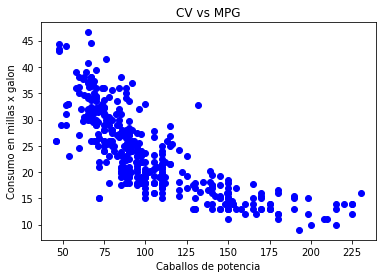

In [128]:
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'bo')
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo en millas x galon')
plt.title('CV vs MPG')

#data_auto.head(100)

### Prueba con modelo lineal

In [151]:
Xl = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Yl = data_auto['mpg'].fillna(data_auto['mpg'].mean())
lm_l = LinearRegression()
Xl_data = Xl[:,np.newaxis]

In [141]:
lm_l.fit(Xl_data,Yl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

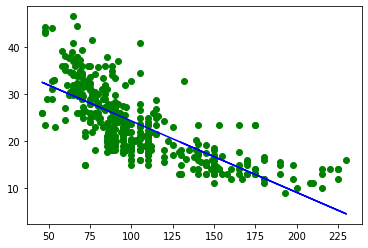

In [142]:
plt.plot(Xl,Yl, 'go')
plt.plot(Xl, lm_l.predict(Xl_data), color ='blue')

In [145]:
lm_l.score(Xl_data, Yl)
RSE =np.sqrt(sum((Yl - lm_l.predict(Xl_data))**2)/(len(Xl_data)-1))
RSE
yl_mean = np.mean(Yl)
Erl = RSE/yl_mean
Erl

0.574653340645025

5.0468794808255115

0.2146277336163346

### Prueba con modelo cuadratico y lineal

In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


In [148]:
Xl_data = Xl**2
Xl_data = Xl_data[:,np.newaxis]


In [153]:
poly = PolynomialFeatures(degree=2)
Xl_data = poly.fit_transform(Xl[:,np.newaxis])
lm_cl = linear_model.LinearRegression()
lm_cl.fit(Xl_data, Yl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
lm_cl.score(Xl_data, Yl)
lm_cl.intercept_
lm_cl.coef_


0.6439066584257469

55.026192447080355

array([ 0.        , -0.43404318,  0.00112615])

In [161]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    Xl_data = poly.fit_transform(Xl[:,np.newaxis])
    lm_cl = linear_model.LinearRegression()
    lm_cl.fit(Xl_data, Yl)
    print(lm_cl.score(Xl_data, Yl))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6439066584257469


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6444678885560744


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6467674189704502


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6547512489366876


## El problema de los Outliers

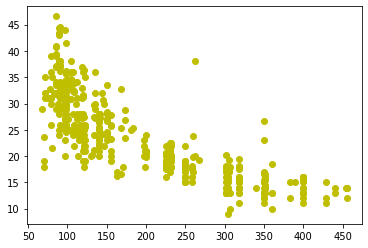

In [164]:
plt.plot(data_auto['displacement'], data_auto['mpg'], 'yo')

In [167]:
xo = data_auto['displacement'].fillna(data_auto['displacement'].mean())
xo = xo[:,np.newaxis]
yo = data_auto['mpg'].fillna(data_auto['mpg'].mean())

lmo = LinearRegression()
lmo.fit(xo,yo)
lmo.score(xo,yo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6261049762826918

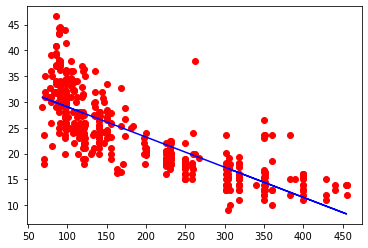

In [168]:
plt.plot(xo,yo,'ro')
plt.plot(xo,lmo.predict(xo), color = 'blue')

In [169]:
data_auto[(data_auto['displacement']>250)&(data_auto['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [171]:
data_auto_clean = data_auto.drop([395,258,305,372])

xo = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())
xo = xo[:,np.newaxis]
yo = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())

lmo = LinearRegression()
lmo.fit(xo,yo)
lmo.score(xo,yo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6466514317531822

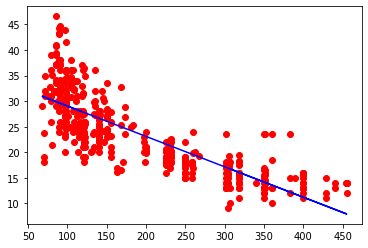

In [176]:
plt.plot(xo,yo,'ro')
plt.plot(xo,lmo.predict(xo), color = 'blue')


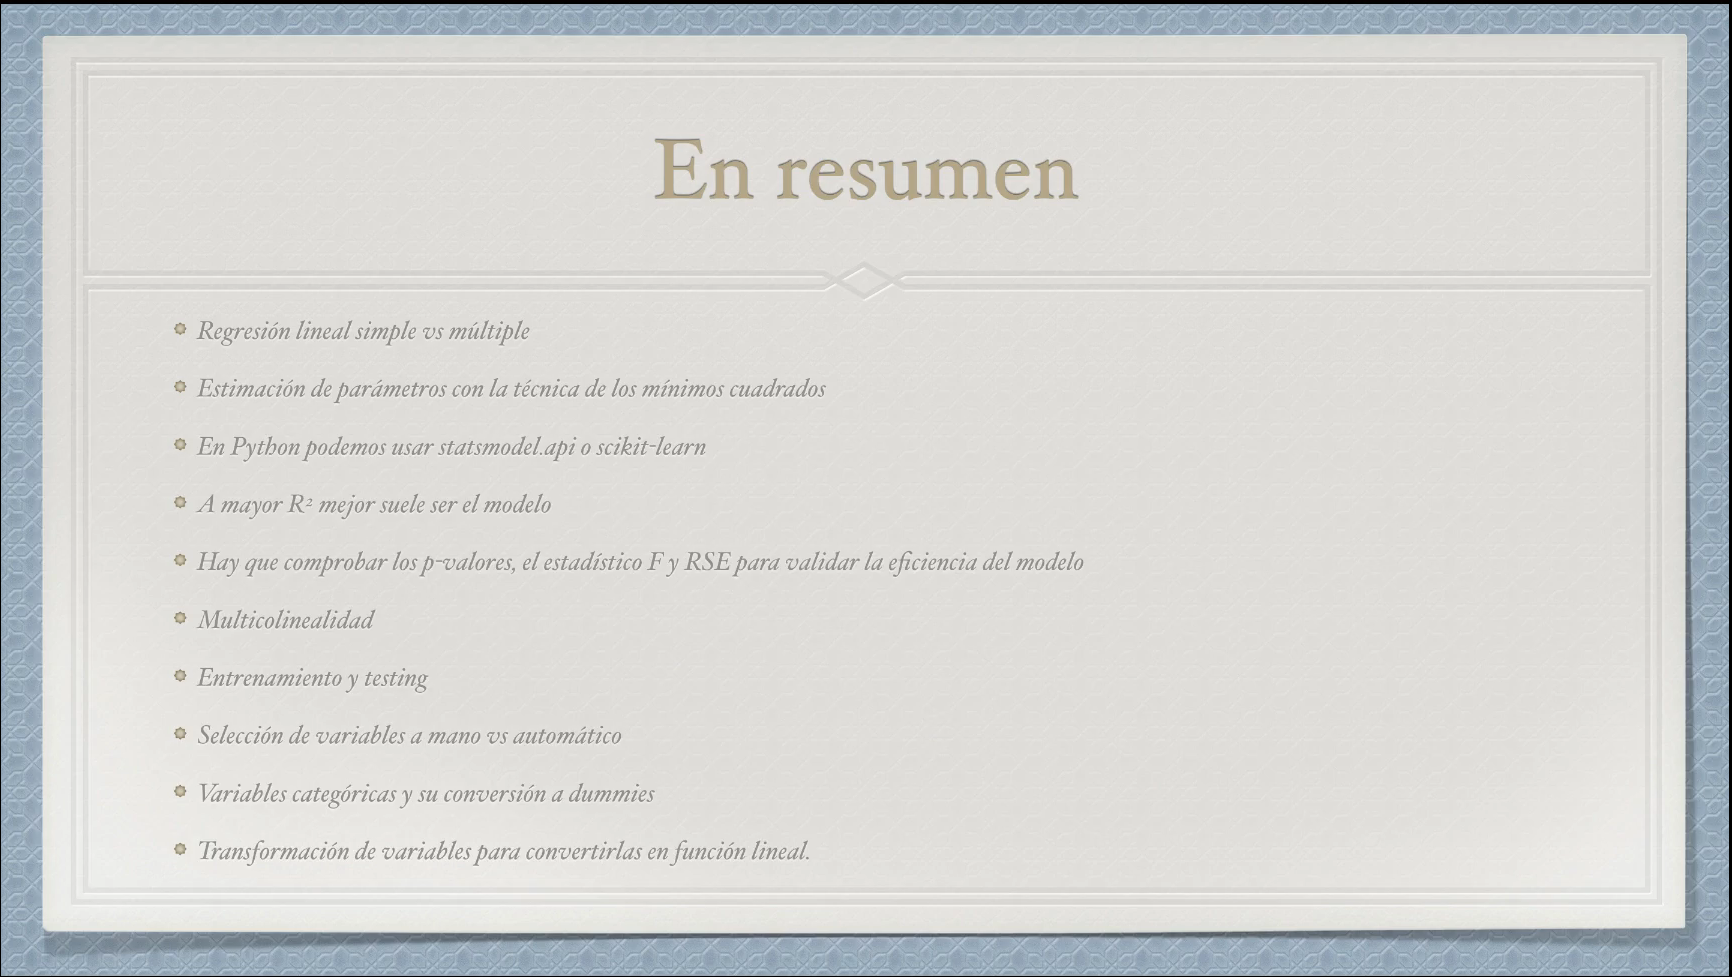